In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def adatcsv(start_date,end_date,countries,delete_columns=[]):
    '''
    beolvassa a csv fájlt és csinál belőle egy pandas adatszerkezetet,

    start_date, end_date stringek yyyy-mm-dd alakban,

    countries egy string lista azon országokból, amiket meg akarunk tartani,
    
    delete_columns string lista azon oszlopokról, amiket ki akarunk törölni
    '''  
    df = pd.read_csv('owid-covid-data.csv')                
    df = df[df["location"].isin(countries)]
    df = df[(df["date"]>=start_date) & (df["date"]<=end_date)]
    df = df.drop(delete_columns, axis=1)

    return df

In [3]:
df = pd.read_csv('owid-covid-data.csv')



In [4]:
europe_rows = df[df['continent'] == 'Europe']
elso_3 = europe_rows[((europe_rows['date'] >= '2020-01-05') & (europe_rows['date'] <= '2020-03-05'))]
europe_rows

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
3012,ALB,Europe,Albania,2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3013,ALB,Europe,Albania,2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3014,ALB,Europe,Albania,2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3015,ALB,Europe,Albania,2020-01-08,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
3016,ALB,Europe,Albania,2020-01-09,NaN,0.0,NaN,0.0,NaN,NaN,...,51.2,NaN,2.89,78.57,0.795,2842318,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372904,OWID_WLS,Europe,Wales,2023-07-08,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
372905,OWID_WLS,Europe,Wales,2023-07-09,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
372906,OWID_WLS,Europe,Wales,2023-07-10,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN
372907,OWID_WLS,Europe,Wales,2023-07-11,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,3170000,NaN,NaN,NaN,NaN


In [7]:
#sulyos fertozottseg:Albania
Albania = df[df['location'] == 'Albania']
countries=['Albania']



In [8]:
eu_members= [
    "AUT",  
    "BEL",  
    "BGR",  
    "CYP",  
    "CZE",  
    "DEU",  
    "DNK",  
    "EST",  
    "ESP",  
    "FIN",  
    "FRA",  
    "GRC",  
    "HRV",  
    "HUN",  
    "IRL",  
    "ITA",  
    "LTU",  
    "LUX",  
    "LVA",  
    "MLT",  
    "NLD",  
    "POL",  
    "PRT",  
    "ROU",  
    "SWE",  
    "SVN",  
    "SVK",  
]

In [8]:
#A kelet-európai régió halálozási adatok (2021-12-12)
#Belarus,Romania,Ukraine,Moldova,Estonia,Georgia,Latvia,Lithuania
start_date='2021-12-11'
end_date='2021-12-11'
europe_df = df[df['continent'] == 'Europe']
europe_locations = europe_df['location'].tolist()
countries = list(set([location.strip().title() for location in europe_locations]))
eastern_europe_countries=['Belarus','Romania','Ukraine','Moldova','Estonia','Georgia','Latvia','Lithuania']
E_Europe=adatcsv(start_date,end_date,eastern_europe_countries,delete_columns=[])
average_deaths = E_Europe['total_deaths'].mean()
teszt=E_Europe[E_Europe['location']=='Lithuania'] 
E_Europe


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,icu_patients,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
30870,BLR,Europe,Belarus,2021-12-11,662056.0,0.0,5147.0,0.0,0.94,NaN,...,46.1,NaN,11.000,74.79,0.823,9534956,NaN,NaN,NaN,NaN
101561,EST,Europe,Estonia,2021-12-11,214996.0,0.0,1738.0,0.0,0.98,NaN,...,39.3,NaN,4.690,78.74,0.892,1326064,NaN,NaN,NaN,NaN
122691,GEO,Asia,Georgia,2021-12-11,865293.0,0.0,12344.0,0.0,0.92,NaN,...,55.5,NaN,2.600,73.77,0.812,3744385,NaN,NaN,NaN,NaN
181482,LVA,Europe,Latvia,2021-12-11,257327.0,0.0,4582.0,0.0,0.96,NaN,...,51.0,NaN,5.570,75.29,0.866,1850654,NaN,NaN,NaN,NaN
190518,LTU,Europe,Lithuania,2021-12-11,483449.0,0.0,6861.0,0.0,0.96,125.0,...,38.0,NaN,6.560,75.93,0.882,2750058,NaN,NaN,NaN,NaN
216994,MDA,Europe,Moldova,2021-12-11,366162.0,0.0,9787.0,0.0,0.89,NaN,...,44.6,86.979,5.800,71.90,0.750,3272993,NaN,NaN,NaN,NaN
277847,ROU,Europe,Romania,2021-12-11,1785120.0,0.0,57021.0,0.0,0.66,NaN,...,37.1,NaN,6.892,76.05,0.828,19659270,NaN,NaN,NaN,NaN
354314,UKR,Europe,Ukraine,2021-12-11,3459680.0,0.0,85957.0,0.0,0.87,NaN,...,47.4,NaN,8.800,72.06,0.779,39701744,NaN,NaN,NaN,NaN


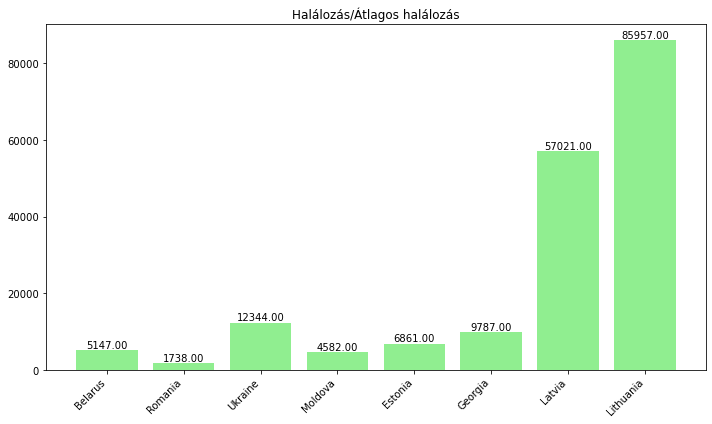

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
y=average_deaths
x=np.linspace(0,10)
E_Europe['MortalityComparison'] = E_Europe['total_deaths'] 

plt.figure(figsize=(10, 6))
bars = plt.bar(eastern_europe_countries, E_Europe['MortalityComparison'], color='lightgreen')
data={'Countries':['Belarus','Romania','Ukraine','Moldova','Estonia','Georgia','Latvia','Lithuania']}
sample_df = pd.DataFrame(data)
#vmi gaz van itt
plt.title('Halálozás/Átlagos halálozás')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')
#plt.plot(x,y)
plt.tight_layout()
plt.show()


In [ ]:
#kevesbe sulyos

In [ ]:
#alacsony

In [57]:

last_occured=[]
for country in eu_members:
    last_occurrence_index = Europe[Europe['iso_code'] == country].index[-1]
    last_occured.append(last_occurrence_index)
last_occured

[21168,
 31730,
 49802,
 81464,
 82970,
 123551,
 86002,
 100915,
 320674,
 113009,
 114515,
 128069,
 76946,
 149170,
 158226,
 162744,
 189872,
 194429,
 180836,
 204280,
 232914,
 269671,
 271177,
 277201,
 326698,
 310132,
 308626]